# LAB: Comparação de modelos

## Introdução

Neste lab, vamos comparar o rendimento de todos os modelos que aprendemos até agora, utilizando o [conjunto de dados sobre avaliação de carros](https://archive.ics.uci.edu/ml/machine-learning-databases/car/). Já estamos bem familiarizados com esse conjunto de dados. Em particular, vamos usar uma divisão treino-teste do conjunto de dados para observar as seguintes métricas:
- accuracy score
- confusion matrix
- classification report

Para os seguintes modelos:
- KNN
- KNN + Bagging
- Regressão logística
- Árvores de decisão
- Support Vector Machines
- Random Forest &amp; Extra Trees

## Exercício

### Requisitos

1. Preparar os dados: codificar features, pré-processar
- Definir funções úteis para tarefas repetitivas
- KNN
    1. Avaliar o rendimento de KNN
    - Avaliar o rendimento de Bagging + KNN
- Avaliar o rendimento da regressão logística
- Avaliar o rendimento de árvores de decisão
- Avaliar o rendimento de Support Vector Machines
- Avaliar o rendimento de Random Forest &amp; Extra Trees
- Comparação final dos modelos

**Extra:**

- Repetir a análise usando uma codificação one hot para as features categóricas em lugar do mapeamento a valores inteiros. Os resultados mudam?

### Outros recursos

- [Conjunto de dados sobre avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
- [Bagging Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
- [Grid Search](http://scikit-learn.org/stable/modules/grid_search.html)

## 1. Preparação dos dados

O [conjunto de dados sobre avaliação de carros](https://archive.ics.uci.edu/ml/machine-learning-databases/car/) está na pasta datasets. Você já deveria estar familiarizado com ele.

1. Ler os dados em um dataframe do Pandas
- Codificar adequadamente as features categóricas: definir um mapeamento que preserve a ordem (designando números menores a palavras que indiquem quantidades menores)
- Separar as features da variável-alvo em X e y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car.csv') #Revisar o caminho do arquivo
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
print (df.buying.unique())
print (df.maint.unique())
print (df.lug_boot.unique())
print (df.safety.unique())
print (df.acceptability.unique())
print (df.persons.unique())
print (df.doors.unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']
['2' '4' 'more']
['2' '3' '4' '5more']


In [4]:
map1 = {'low':1,
        'med':2,
        'high':3,
        'vhigh':4}

map2 = {'small':1,
        'med':2,
        'big':3}

map3 = {'unacc':1,
        'acc':2,
        'good':3,
        'vgood':4}

map4 = {'2': 2,
        '4': 4,
        'more': 5}

map5 = {'2': 2,
        '3': 3,
        '4': 4,
        '5more': 5}

In [5]:
features = [c for c in df.columns if c != 'acceptability']
dfn = df.copy()

dfn.buying= df.buying.map(map1)
dfn.maint= df.maint.map(map1)
dfn.lug_boot = df.lug_boot.map(map2)
dfn.persons = df.persons.map(map4)
dfn.doors = df.doors.map(map5)
dfn.safety = df.safety.map(map1)
dfn.acceptability = df.acceptability.map(map3)

X = dfn[features]
y = dfn['acceptability']
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2


In [6]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null int64
maint            1728 non-null int64
doors            1728 non-null int64
persons          1728 non-null int64
lug_boot         1728 non-null int64
safety           1728 non-null int64
acceptability    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


## 2. Preparação útil

Sendo que vamos comparar vários modelos, é conveniente escrever funções auxiliares.

1. Separar X e y entre treino / teste, usando 30% como set de teste, e designando `random_state=42`
    - Conferir a mistura e estratificação dos dados
2. Definir uma função chamada `evaluate_model`, para treinar o modelo com o set de treino e avaliá-lo com o set de teste. E para calcular:
    - accuracy score
    - confusion matrix
    - classification report
3. Criar um dicionário global para armazenar os diferentes modelos, para uso posterior.


In [7]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print (cm)
    print (cr)
    
    return a

all_models = {}

## 3.a KNN

Começar com `KNeighborsClassifier`.

1. Criar um modelo KNN
- Avaliar seu rendimento com a função definida previamente
- Procurar o valor ótimo de K com Grid Search
    - Tenha cuidado ao realizar a validação cruzada no Grid Search

In [8]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[354   9   0   0]
 [  8 107   0   0]
 [  0   9  11   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.84      0.93      0.88       115
          3       1.00      0.52      0.69        21
          4       0.95      0.90      0.92        20

avg / total       0.95      0.94      0.94       519



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors': range(2,60)}
gsknn = GridSearchCV(KNeighborsClassifier(),params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))

In [10]:
gsknn.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(2, 60)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [11]:
gsknn.best_params_

{'n_neighbors': 5}

In [12]:
gsknn.best_score_

0.95081018518518523

In [13]:
evaluate_model(gsknn.best_estimator_)

[[354   9   0   0]
 [  8 107   0   0]
 [  0   9  11   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.84      0.93      0.88       115
          3       1.00      0.52      0.69        21
          4       0.95      0.90      0.92        20

avg / total       0.95      0.94      0.94       519



0.94412331406551064

In [14]:
all_models['knn'] = {'model': gsknn.best_estimator_,
'score': gsknn.best_score_}

## 3.b Bagging + KNN

Após achar o K ótimo, vamos colocar `KNeighborsClassifier` em um BaggingClassifier e ver se a pontuação melhora.

1. Usar o modelo KNN em um Bagging Classifier
- Avaliar o rendimento
- Fazer um Grid Search só nos parâmetros do Bagging Classifier

In [15]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())

In [16]:
evaluate_model(baggingknn)

[[354   9   0   0]
 [  7 106   2   0]
 [  0   5  15   1]
 [  0   4   0  16]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.85      0.92      0.89       115
          3       0.88      0.71      0.79        21
          4       0.94      0.80      0.86        20

avg / total       0.95      0.95      0.95       519



0.94605009633911363

In [17]:
bagging_params = {'n_estimators': [10, 20],
'max_samples': [0.7, 1.0],'max_features': [0.7, 1.0],'bootstrap_features': [True, False]}

gsbaggingknn = GridSearchCV(baggingknn,
bagging_params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))

In [18]:
gsbaggingknn.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'max_features': [0.7, 1.0], 'bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
gsbaggingknn.best_params_

{'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 10}

In [20]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
'score': evaluate_model(gsbaggingknn.best_estimator_)}

[[357   5   1   0]
 [  9 106   0   0]
 [  0   7  12   2]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.88      0.92      0.90       115
          3       0.92      0.57      0.71        21
          4       0.90      0.90      0.90        20

avg / total       0.95      0.95      0.95       519



## 4. Regressão Logística

Agora vamos ver se a regressão logística funciona melhor

1. Iniciar uma regressão logística e avaliar
- Buscar os parâmetros ótimos com Grid Search
- Ver se o Bagging melhora o resultado

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
'score': evaluate_model(lr)}

[[347  11   4   1]
 [ 59  53   3   0]
 [  5  15   1   0]
 [  0  19   0   1]]
             precision    recall  f1-score   support

          1       0.84      0.96      0.90       363
          2       0.54      0.46      0.50       115
          3       0.12      0.05      0.07        21
          4       0.50      0.05      0.09        20

avg / total       0.73      0.77      0.74       519



In [22]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
'penalty': ['l1', 'l2']}
gslr = GridSearchCV(lr,
params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gslr.fit(X, y)

print (gslr.best_params_)
print (gslr.best_score_)

all_models['gslr'] = {'model': gslr.best_estimator_,
'score': evaluate_model(gslr.best_estimator_)}

{'C': 100.0, 'penalty': 'l1'}
0.831018518519
[[344  14   4   1]
 [ 48  64   3   0]
 [  4  14   2   1]
 [  0   8   0  12]]
             precision    recall  f1-score   support

          1       0.87      0.95      0.91       363
          2       0.64      0.56      0.60       115
          3       0.22      0.10      0.13        21
          4       0.86      0.60      0.71        20

avg / total       0.79      0.81      0.80       519



In [23]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
bagging_params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gsbagginglr.fit(X, y)

print (gsbagginglr.best_params_)
print (gsbagginglr.best_score_)

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
'score': evaluate_model(gsbagginglr.best_estimator_)}

{'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
0.831018518519
[[344  14   4   1]
 [ 50  62   3   0]
 [  3  15   2   1]
 [  0   8   0  12]]
             precision    recall  f1-score   support

          1       0.87      0.95      0.91       363
          2       0.63      0.54      0.58       115
          3       0.22      0.10      0.13        21
          4       0.86      0.60      0.71        20

avg / total       0.79      0.81      0.79       519



## 5. Árvores de decisão

Vamos conferir o rendimento das árvores de decisão

1. Criar uma árvore de decisão e avaliá-la
- Buscar os parâmetros ótimos com Grid Search
- Ver se o Bagging melhora o resultado

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
'score': evaluate_model(dt)}

[[360   3   0   0]
 [ 11 102   2   0]
 [  1   4  16   0]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       363
          2       0.93      0.89      0.91       115
          3       0.89      0.76      0.82        21
          4       1.00      0.95      0.97        20

avg / total       0.96      0.96      0.96       519



In [25]:
params = {'criterion': ['gini', 'entropy'],
'splitter': ['best', 'random'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2, 3]}
gsdt = GridSearchCV(dt,
params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gsdt.fit(X, y)
print (gsdt.best_params_)
print (gsdt.best_score_)

all_models['gsdt'] = {'model': gsdt.best_estimator_,
'score': evaluate_model(gsdt.best_estimator_)}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.975115740741
[[361   2   0   0]
 [ 14 100   1   0]
 [  1   5  15   0]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.96      0.99      0.98       363
          2       0.93      0.87      0.90       115
          3       0.94      0.71      0.81        21
          4       1.00      1.00      1.00        20

avg / total       0.96      0.96      0.95       519



In [26]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
bagging_params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gsbaggingdt.fit(X, y)

print (gsbaggingdt.best_params_)
print (gsbaggingdt.best_score_)

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
0.96875
[[360   2   1   0]
 [  7 106   1   1]
 [  1   4  14   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.98       363
          2       0.94      0.92      0.93       115
          3       0.88      0.67      0.76        21
          4       0.86      0.95      0.90        20

avg / total       0.96      0.96      0.96       519



## 6. Support Vector Machines

Vamos analisar o funcionamento de SVM

1. Criar um SVM e avaliar
- Buscar os parâmetros ótimos com Grid Search
- Ver se o Bagging melhora o resultado

In [27]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
'score': evaluate_model(svm)}

[[352  11   0   0]
 [  4 110   1   0]
 [  0   5  14   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.97      0.98       363
          2       0.87      0.96      0.91       115
          3       0.93      0.67      0.78        21
          4       0.90      0.95      0.93        20

avg / total       0.96      0.95      0.95       519



In [28]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
'gamma': ['auto', 0.1, 1.0, 10.0],'kernel': ['linear', 'rbf']}

gssvm = GridSearchCV(svm,
params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gssvm.fit(X, y)
print (gssvm.best_params_)
print (gssvm.best_score_)

all_models['gssvm'] = {'model': gssvm.best_estimator_,
'score': evaluate_model(gssvm.best_estimator_)}

{'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
0.982060185185
[[363   0   0   0]
 [  4 111   0   0]
 [  0   2  19   0]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       363
          2       0.98      0.97      0.97       115
          3       1.00      0.90      0.95        21
          4       1.00      1.00      1.00        20

avg / total       0.99      0.99      0.99       519



In [29]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
bagging_params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gsbaggingsvm.fit(X, y)

print (gsbaggingsvm.best_params_)
print (gsbaggingsvm.best_score_)

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
0.982060185185
[[363   0   0   0]
 [  5 110   0   0]
 [  0   3  16   2]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       363
          2       0.97      0.96      0.96       115
          3       1.00      0.76      0.86        21
          4       0.91      1.00      0.95        20

avg / total       0.98      0.98      0.98       519



## 7. Random Forest &amp; Extra Trees

Finalmente, vamos ver o funcionamento de Random Forest e Extra Trees

1. Criar RF e ET e avaliá-los
- Buscar os parâmetros ótimos com Grid Search


In [30]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
'score': evaluate_model(rf)}


et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
'score': evaluate_model(et)}

[[360   2   1   0]
 [  5 110   0   0]
 [  0   6  15   0]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.92      0.96      0.94       115
          3       0.94      0.71      0.81        21
          4       1.00      0.95      0.97        20

avg / total       0.97      0.97      0.97       519

[[359   4   0   0]
 [  7 106   2   0]
 [  0   6  13   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.98       363
          2       0.91      0.92      0.91       115
          3       0.87      0.62      0.72        21
          4       0.90      0.95      0.93        20

avg / total       0.96      0.96      0.96       519



In [33]:
params = {'n_estimators':[3, 5, 10, 50],
'criterion': ['gini', 'entropy'],'max_depth': [None, 3, 5],'min_samples_split': [2,5],'class_weight':[None, 'balanced']}

gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gsrf.fit(X, y)
print (gsrf.best_params_)
print (gsrf.best_score_)

all_models['gsrf'] = {'model': gsrf.best_estimator_,
'score': evaluate_model(gsrf.best_estimator_)}

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
0.975694444444
[[357   5   1   0]
 [  5 109   0   1]
 [  0   4  15   2]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.99      0.98      0.98       363
          2       0.91      0.95      0.93       115
          3       0.94      0.71      0.81        21
          4       0.86      0.90      0.88        20

avg / total       0.96      0.96      0.96       519



In [34]:
gset = GridSearchCV(ExtraTreesClassifier(n_jobs=-1),
params, n_jobs=-1,cv=KFold(n_splits=3, shuffle=True))
gset.fit(X, y)
print (gset.best_params_)
print (gset.best_score_)

all_models['gset'] = {'model': gset.best_estimator_,
'score': evaluate_model(gset.best_estimator_)}

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
0.974537037037
[[359   4   0   0]
 [  3 110   1   1]
 [  0   4  16   1]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.92      0.96      0.94       115
          3       0.94      0.76      0.84        21
          4       0.90      0.95      0.93        20

avg / total       0.97      0.97      0.97       519



## 8. Comparação de modelos

Vamos comparar os resultados dos diferentes modelos.

1. Fazer um gráfico de barras dos resultados dos melhores modelos. Qual o vencedor?
- Voltar a avaliar todos os modelos com uma validação cruzada estratificada de 3-fold
- Fazer um gráfico de barras que mostre o valor médio e desvio do resultado da validação cruzada. O vencedor continua sendo o mesmo?


,score
model,
gssvm,0.988439
gsbaggingsvm,0.980732
rf,0.971098
gset,0.971098
gsbaggingdt,0.961464
gsrf,0.961464
dt,0.957611
et,0.957611
gsdt,0.955684


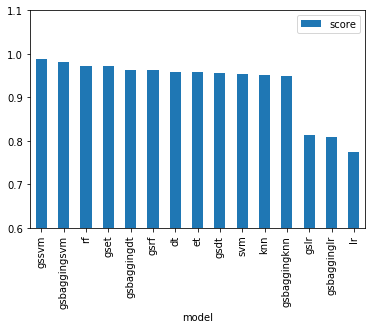

In [36]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.items()],
columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)

scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X, y,
cv=StratifiedKFold(n_splits=3, shuffle=True),n_jobs=-1)    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.items():
    cvres = retest(v['model'])
    print (k), 
    all_models[k]['cvres'] = cvres
    

knn
gsbaggingknn
lr
gslr
gsbagginglr
dt
gsdt
gsbaggingdt
svm
gssvm
gsbaggingsvm
rf
et
gsrf
gset


,score,error
model,,
gsbaggingsvm,0.983792,0.002971
gssvm,0.983790,0.004581
gsbaggingdt,0.980326,0.004319
dt,0.977423,0.005144
gsrf,0.976259,0.012901
gset,0.972223,0.003745
gsdt,0.969910,0.002123
et,0.961229,0.006685
rf,0.961223,0.003324


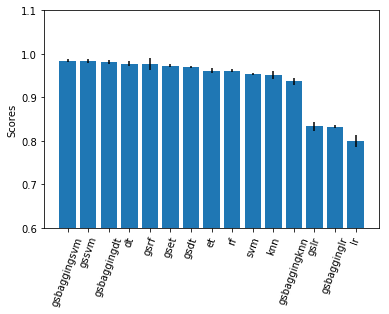

In [42]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.items()],
columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)

fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
yerr=cvscores.error,tick_label=cvscores.index)
ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

cvscores


## Extra

Já codificamos os dados com um mapa que preservava a ordem.
Como os resultados mudariam se codificássemos os dados categóricos usando `pd.get_dummies` ou `OneHotEncoder` para codificá-los como variáveis binárias?

1. Repetir a análise para esse cenário. É melhor?
- Experimentar com outros modelos ou outros parâmetros. Você consegue obter o melhor rendimento da aula?

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

all_modelsoh={}

onehotpipe = make_pipeline(OneHotEncoder() , dt)

all_modelsoh['onehotpipe'] = {'model': onehotpipe,
'score': evaluate_model(onehotpipe)}

[[358   4   1   0]
 [ 18  96   1   0]
 [  0   1  18   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.95      0.99      0.97       363
          2       0.94      0.83      0.88       115
          3       0.90      0.86      0.88        21
          4       0.90      0.95      0.93        20

avg / total       0.95      0.95      0.94       519



In [ ]:
# A pontuação da árvore de decisão cai quando empregamos OneHotEncoder em lugar de uma escala numérica.